In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df=df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
X=df.drop(columns='Purchased',axis=1)
y=df['Purchased']

In [6]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=0)

In [10]:
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [12]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
X_train_scaled #We get np.array after scaling of dataframe

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [14]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)#converting array to df
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [15]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [16]:
round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [17]:
round(X_train_scaled.describe(),1) #After scaling

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


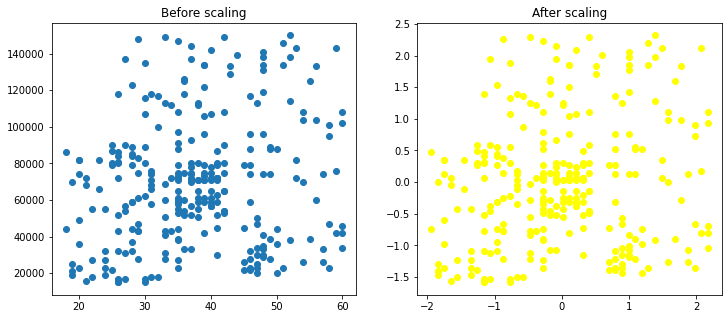

In [18]:
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='yellow')
ax2.set_title("After scaling")
plt.show()

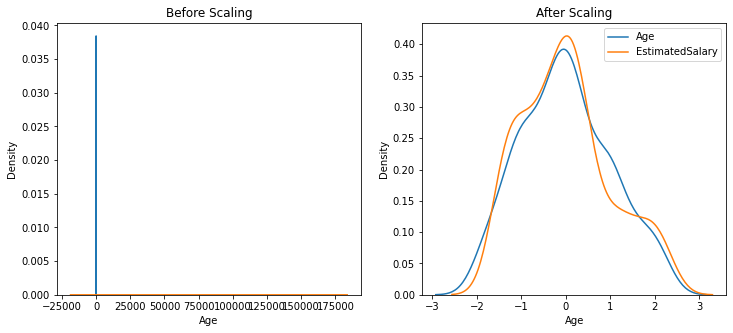

In [19]:
#pdf plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling=No comparison between them
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)#The range of age is very small
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)#the range of estimatedsalary is large
# after scaling=Its comparable
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.legend(labels=["Age","EstimatedSalary"])
plt.show()

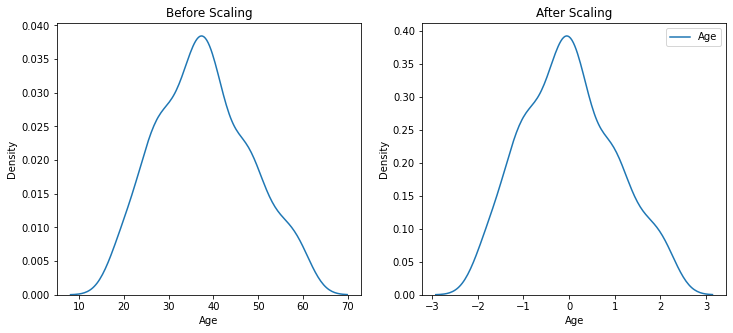

In [20]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
ax2.set_title("After Scaling")
plt.legend(labels=["Age"])
plt.show()

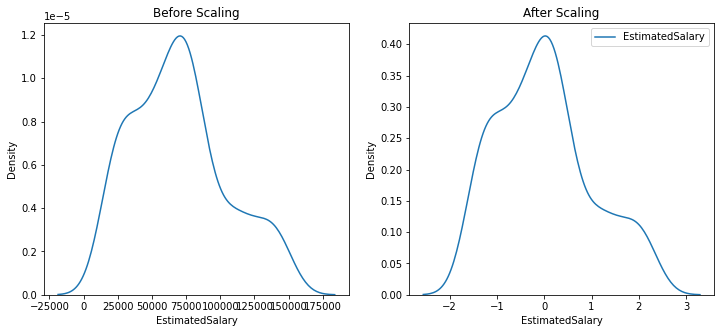

In [21]:
fig ,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
ax1.set_title("Before Scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
ax2.set_title("After Scaling")
plt.legend(labels=["EstimatedSalary"])
plt.show()


**From above all observations, it can be noted that even if we do standardization, the shape of the curve doesnt change but the scale changes**

# Comparison between Scaling vs Not Scaling

**Logistic Regression-Standardization**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [23]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [24]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [25]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [26]:
print("The accuracy without scaling:", accuracy_score(y_pred, y_test))

The accuracy without scaling: 0.6583333333333333


In [27]:
print("The accuracy with scaling:", accuracy_score(y_pred_scaled, y_test))

The accuracy with scaling: 0.8666666666666667


**DecisionTreeClassifier-Standardization**

In [28]:
dtc=DecisionTreeClassifier()
dtc_scaled=DecisionTreeClassifier()

In [29]:
dtc.fit(X_train,y_train)
dtc_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [30]:
ypredd=dtc.predict(X_test)
ypredd_scaled=dtc_scaled.predict(X_test_scaled)

In [31]:
print("The accuracy without scaling:", accuracy_score(ypredd, y_test))

The accuracy without scaling: 0.875


In [32]:
print("The accuracy without scaling:", accuracy_score(ypredd_scaled, y_test))

The accuracy without scaling: 0.875


There is no difference as in few models standardization not required

# Effect of an Outlier

In [33]:
df1 = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_1180\1012318534.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


In [34]:
df1.tail()

,Age,EstimatedSalary,Purchased
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1
402,95,350000,1


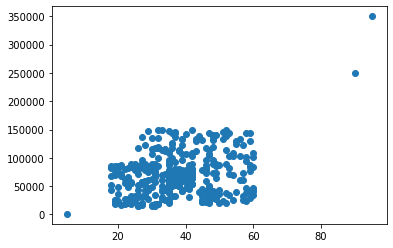

In [35]:
plt.scatter(df1['Age'],df1['EstimatedSalary'])
plt.show()

In [36]:
X1=df1.drop(columns='Purchased',axis=1)
y1=df1['Purchased']

In [37]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X1,y1,test_size=0.3,random_state=0)

In [38]:
ss=StandardScaler()

In [39]:
Xtrainscaled=ss.fit_transform(Xtrain)
Xtestscaled=ss.transform(Xtest)

In [42]:
Xtrainscaled=pd.DataFrame(Xtrainscaled, columns=Xtrain.columns)
Xtestscaled=pd.DataFrame(Xtrainscaled, columns=Xtest.columns)

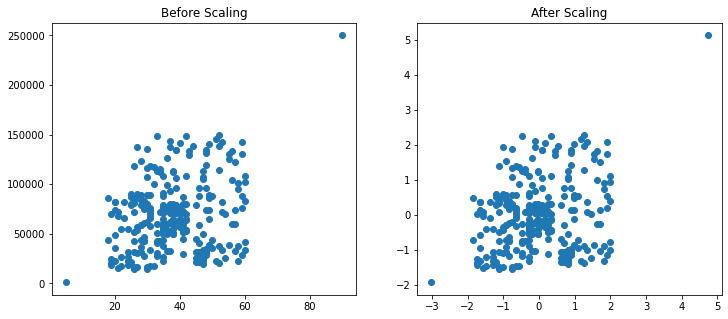

In [43]:
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(Xtrain['Age'],Xtrain['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(Xtrainscaled['Age'],Xtrainscaled['EstimatedSalary'])
ax2.set_title("After Scaling")
plt.show()

**Standardization has no impact on outliers, so we have to handle it explicitly**